In [37]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os

def findFiles(path): return glob.glob(path)

print(findFiles('data/names/*.txt'))

import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)
print('n_letters:',n_letters)

def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )
print(unicodeToAscii('Ślusàrski'))
print(unicodeToAscii('Ankit'))
category_lines = {}  
all_categories = []

def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in findFiles('data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines
print('Category Lines: ',category_lines)
print('All Category: ',all_categories)
n_categories = len(all_categories)
print('n_category: ',n_categories)

['data/names\\Arabic.txt', 'data/names\\Chinese.txt', 'data/names\\Czech.txt', 'data/names\\Dutch.txt', 'data/names\\English.txt', 'data/names\\French.txt', 'data/names\\German.txt', 'data/names\\Greek.txt', 'data/names\\Irish.txt', 'data/names\\Italian.txt', 'data/names\\Japanese.txt', 'data/names\\Korean.txt', 'data/names\\Polish.txt', 'data/names\\Portuguese.txt', 'data/names\\Russian.txt', 'data/names\\Scottish.txt', 'data/names\\Spanish.txt', 'data/names\\Vietnamese.txt']
n_letters: 57
Slusarski
Ankit
Category Lines:  {'Arabic': ['Khoury', 'Nahas', 'Daher', 'Gerges', 'Nazari', 'Maalouf', 'Gerges', 'Naifeh', 'Guirguis', 'Baba', 'Sabbagh', 'Attia', 'Tahan', 'Haddad', 'Aswad', 'Najjar', 'Dagher', 'Maloof', 'Isa', 'Asghar', 'Nader', 'Gaber', 'Abboud', 'Maalouf', 'Zogby', 'Srour', 'Bahar', 'Mustafa', 'Hanania', 'Daher', 'Tuma', 'Nahas', 'Saliba', 'Shamoon', 'Handal', 'Baba', 'Amari', 'Bahar', 'Atiyeh', 'Said', 'Khouri', 'Tahan', 'Baba', 'Mustafa', 'Guirguis', 'Sleiman', 'Seif', 'Dagher

All Category:  ['Arabic', 'Chinese', 'Czech', 'Dutch', 'English', 'French', 'German', 'Greek', 'Irish', 'Italian', 'Japanese', 'Korean', 'Polish', 'Portuguese', 'Russian', 'Scottish', 'Spanish', 'Vietnamese']
n_category:  18


In [38]:
print(category_lines['Korean'][:-1])

['Ahn', 'Baik', 'Bang', 'Byon', 'Cha', 'Chang', 'Chi', 'Chin', 'Cho', 'Choe', 'Choi', 'Chong', 'Chou', 'Chu', 'Chun', 'Chung', 'Chweh', 'Gil', 'Gu', 'Gwang ', 'Ha', 'Han', 'Ho', 'Hong', 'Hung', 'Hwang', 'Hyun ', 'Jang', 'Jeon', 'Jeong', 'Jo', 'Jon', 'Jong', 'Jung ', 'Kang', 'Kim', 'Ko', 'Koo', 'Ku', 'Kwak', 'Kwang ', 'Lee', 'Li', 'Lim ', 'Ma', 'Mo', 'Moon', 'Nam', 'Ngai', 'Noh', 'Oh ', 'Pae', 'Pak', 'Park ', 'Ra', 'Rhee', 'Rheem', 'Ri', 'Rim', 'Ron', 'Ryom', 'Ryoo', 'Ryu', 'San', 'Seo', 'Seok', 'Shim', 'Shin', 'Shon', 'Si', 'Sin', 'So', 'Son', 'Song', 'Sook', 'Suh', 'Suk', 'Sun', 'Sung', 'Tsai ', 'Wang', 'Woo', 'Yang', 'Yeo', 'Yeon', 'Yi', 'Yim', 'Yoo', 'Yoon', 'You', 'Youj', 'Youn', 'Yu']


In [39]:
import torch
def letterToIndex(letter):
    return all_letters.find(letter)

def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor
print(letterToIndex('A'))
print(letterToTensor('J'))
print(lineToTensor('Jones'))

26
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.,

In [42]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
input = lineToTensor('This is to certify')
#input = torch.cat(list(torch.split(input, 1, dim=0))*10)
hidden = (torch.randn(2, 1, 18), torch.randn(2, 1, 18))
lstm = nn.LSTM(57,18,bidirectional=True)
output, next_hidden = lstm(input, hidden)
print('OUTPUT: ',output)
print('NEXT HIDDEN: ',hidden)

OUTPUT:  tensor([[[-2.4079e-01,  1.2460e-01, -7.0100e-02, -1.9093e-01, -7.0065e-02,
           8.6616e-02, -3.5222e-01,  6.2166e-02, -3.6041e-01, -2.4358e-01,
           5.5768e-01,  1.1977e-01,  4.4079e-01,  4.0064e-01,  3.2238e-01,
          -7.0643e-02,  2.1483e-01,  1.4241e-01,  2.6185e-01,  7.2644e-03,
          -4.9533e-02,  8.3005e-02, -9.1540e-02,  2.6323e-02,  8.4201e-02,
           2.1407e-03, -2.4366e-02,  3.7447e-02, -1.0546e-01, -3.7718e-02,
          -1.2752e-01, -5.1309e-02,  1.5699e-01,  4.0627e-02,  5.0762e-02,
          -7.6519e-02]],

        [[-8.9927e-02,  2.4489e-02, -1.6025e-02, -1.8999e-01, -9.6699e-02,
          -3.4886e-02, -1.3914e-01,  1.3323e-01, -2.6167e-01, -2.3648e-01,
           2.9912e-01,  1.2380e-01,  3.6050e-01,  1.7830e-01,  2.4492e-01,
          -3.1192e-02,  6.2144e-02,  1.3896e-01,  2.2289e-01,  8.1745e-02,
          -8.1433e-02,  1.2902e-01, -4.0823e-02, -3.6663e-04,  1.0226e-01,
           6.1963e-02,  1.8666e-02,  2.1856e-02, -6.8945e-02,  2.

           2.3730e-01]]], grad_fn=<CatBackward>)
NEXT HIDDEN:  (tensor([[[ 0.8881,  1.1581,  1.1722,  0.3257, -0.7303,  0.4622, -1.6701,
          -0.4467,  0.4820, -1.6970,  1.9592,  0.0117,  1.6171,  0.8357,
          -0.2467,  0.5073, -0.2349,  0.6316]],

        [[ 0.8609,  1.1477, -0.7478, -0.4604,  0.8906,  0.7135, -0.2295,
           0.9532,  0.8344, -0.0670,  0.8543, -0.3500, -0.1424, -0.4964,
           0.3727, -0.0900,  1.1579,  0.9177]]]), tensor([[[-1.6039,  0.2468, -0.6515, -0.0856, -0.0341,  0.7875, -0.7602,
          -0.1912, -1.4281, -0.1417,  1.2433,  0.6573,  2.1186,  1.9382,
           2.0165,  0.1398,  0.5703,  0.4022]],

        [[-0.4592,  0.1598, -0.4076, -2.2706,  0.2717,  0.8012, -0.3815,
           0.2553,  2.7919,  0.0347, -0.5867, -0.3732, -0.4705, -0.0744,
          -0.8446,  0.3103,  0.2557,  1.1427]]]))


In [51]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    #print(category_i)
    return all_categories[category_i], category_i

In [44]:
import random
import torch

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line, '/Category Tensor =',category_tensor, '/Line Tensor =',line_tensor)

category = Greek / line = Sakellariou /Category Tensor = tensor([7]) /Line Tensor = tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0.,

          0., 0., 0., 0., 0., 0.]]])
category = Portuguese / line = Guerra /Category Tensor = tensor([13]) /Line Tensor = tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

          0., 0., 0., 0., 0., 0.]]])


In [45]:
import torch
import torch.nn as nn
from torch.autograd import Variable
criterion = nn.CrossEntropyLoss()
learning_rate = 0.005
def train(category_tensor, line_tensor):
    hidden = (torch.zeros(2, 1, 18),torch.zeros(2, 1, 18))
    lstm.zero_grad()
    
    for i in range(line_tensor.size()[0]):
        output, hidden = lstm(line_tensor[i].reshape(1,1,-1), hidden)
        

    temp = torch.reshape(output, (1, 36))
    loss = criterion(temp, category_tensor)
    loss.backward()
    
    for p in lstm.parameters():
        p.data.add_(-learning_rate, p.grad.data)
        
    return output, loss.item() 


In [46]:
import time
import math



n_iters = 100000
print_every = 5000
plot_every = 1000

current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m*60
    return '%dm %ds' % (m, s)
start = time.time()

for iter in range(0, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss
    
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s  / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))
    
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0
        

17
0 0% (0m 0s) 3.4698 Blazek  / Vietnamese ✗ (Czech)
12
5000 5% (0m 40s) 3.4343 Paul  / Polish ✗ (French)
9
10000 10% (1m 21s) 3.2602 Mach  / Italian ✗ (Vietnamese)
7
15000 15% (2m 4s) 2.9134 Adamidis  / Greek ✓
12
20000 20% (2m 47s) 2.8421 Sniegowski  / Polish ✓
10
25000 25% (3m 30s) 2.9010 Mustafa  / Japanese ✗ (Arabic)
0
30000 30% (4m 14s) 3.0328 Manus  / Arabic ✗ (Irish)
15
35000 35% (4m 58s) 2.9177 Abboud  / Scottish ✗ (Arabic)
0
40000 40% (5m 43s) 4.3075 Tourna  / Arabic ✗ (Greek)
0
45000 45% (6m 27s) 2.8095 Rahal  / Arabic ✓
17
50000 50% (7m 11s) 2.6596 Thuy  / Vietnamese ✓
15
55000 55% (7m 52s) 2.8367 Perez  / Scottish ✗ (Spanish)
15
60000 60% (8m 29s) 3.0392 Wiater  / Scottish ✗ (Polish)
17
65000 65% (9m 12s) 2.6347 Luo  / Vietnamese ✗ (Chinese)
5
70000 70% (9m 56s) 2.7750 Lawniczak  / French ✗ (Polish)
0
75000 75% (10m 41s) 3.3924 Sobol  / Arabic ✗ (Polish)
0
80000 80% (11m 28s) 3.0991 Kram  / Arabic ✗ (English)
0
85000 85% (12m 14s) 2.6438 Bitar  / Arabic ✓
0
90000 90% (13m

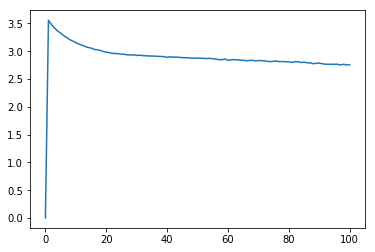

In [48]:
    import matplotlib.pyplot as plt
    import matplotlib.ticker as ticker
    
    plt.figure()
    plt.plot(all_losses)

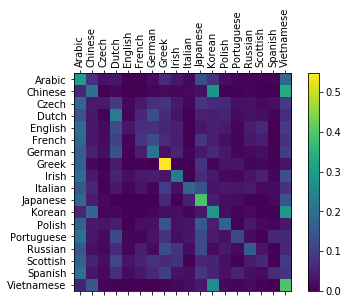

In [52]:
    import torch
    confusion = torch.zeros(n_categories, n_categories)
    n_confusion = 10000
    
    def evaluate(line_tensor):
        hidden = (torch.randn(2, 1, 18),torch.randn(2, 1, 18))
        
        for i in range(line_tensor.size()[0]):
            output, hidden = lstm(line_tensor[i].reshape(1, 1, -1), hidden)
        
        return output
    for i in range(n_confusion):
        category, line, category_tensor, line_tensor = randomTrainingExample()
        output = evaluate(line_tensor)
        guess, guess_i = categoryFromOutput(output)
        category_i = all_categories.index(category)
        confusion[category_i][guess_i] +=1
    
    for i in range(n_categories):
        confusion[i] = confusion[i] / confusion[i].sum()
        
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(confusion.numpy())
    fig.colorbar(cax)
    
    ax.set_xticklabels([''] + all_categories, rotation=90)
    ax.set_yticklabels([''] + all_categories)
    
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    
    plt.show()

In [53]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 2, True)
        #print(topv.shape)
        #print(topi.shape)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][0][i].item()
            category_index = topi[0][0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

predict('Ankit')
predict('Jackson')
predict('Satoshi')


> Ankit
(0.90) Chinese
(0.87) Korean
(0.84) Japanese

> Jackson
(0.84) Russian
(0.73) French
(0.68) Greek

> Satoshi
(0.96) Arabic
(0.90) Japanese
(0.88) Vietnamese
